In [1]:
# Check if results are coherent

import numpy as np

SYSTEM = "dlenet-fashion"
#SYSTEM = "lenet-fashion"
#SYSTEM = "lenet-mnist"
SYSTEM = "vgg16-cifar10"
#SYSTEM = "vgg16-mnist"

if SYSTEM == "dlenet-fashion":
    FNAME = "data/dlenet-fashion/00_L_lambda.csv"
    labels= ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    xrotate = True
elif SYSTEM == "lenet-fashion":
    FNAME = "data/lenet-fashion/00_conv2d0.csv"
    labels= ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    xrotate = True
elif SYSTEM == "lenet-mnist":
    FNAME = "data/lenet-mnist/00_conv2d0.csv"
    labels= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    xrotate = False
elif SYSTEM == "vgg16-cifar10":
    FNAME = "data/vgg16-cifar10/00_block1_conv1.csv"
    labels= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    xrotate = True
elif SYSTEM == "vgg16-mnist":
    FNAME = "data/vgg16-mnist/00_block1_conv1.csv"
    labels= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    xrotate = False

else:
    assert False, "%s unknown" % SYSTEM

GT_INDICE = 1
PRED_INDICE = 2
colors=[
    [166, 206, 227],
    [31, 120, 180],
    [178, 223, 138],
    [51, 160, 44],
    [251, 154, 153],
    [227, 26, 28],
    [253, 191, 111],
    [255, 127, 0],
    [202, 178, 214],
    [106, 61, 154],
    [255, 255, 153],
    [177, 89, 40]
]
colors = [ (c[0]/255., c[1]/255., c[2]/255, 1) for c in colors]
colors

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725, 1),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765, 1),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353, 1),
 (0.2, 0.6274509803921569, 0.17254901960784313, 1),
 (0.984313725490196, 0.6039215686274509, 0.6, 1),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745, 1),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883, 1),
 (1.0, 0.4980392156862745, 0.0, 1),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098, 1),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509, 1),
 (1.0, 1.0, 0.6, 1),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392, 1)]

In [2]:
data = np.loadtxt(FNAME, delimiter=",")
pred = data[:, PRED_INDICE]
gt = data[:, GT_INDICE]

In [3]:
accuracy = 100*np.mean(pred == gt)
print("Accuracy", accuracy)


Accuracy 37.12


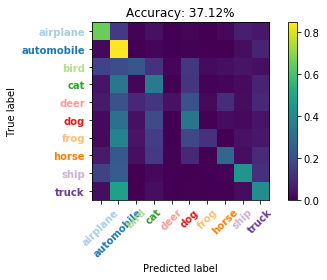

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mat = confusion_matrix(gt, pred, normalize='true')
disp = ConfusionMatrixDisplay(mat, display_labels=labels)
disp.plot(include_values=False)
plt.gca().tick_params(axis='x')
for idx, col in enumerate(colors[:len(plt.gca().get_xticklabels())]):
    plt.gca().get_xticklabels()[idx].set_color(col)    
    plt.gca().get_yticklabels()[idx].set_color(col)
    plt.gca().get_xticklabels()[idx].set_weight('bold')
    plt.gca().get_yticklabels()[idx].set_weight('bold')
    if xrotate:
        plt.gca().get_xticklabels()[idx].set_rotation(45)
plt.title("Accuracy: %.2f%%" % accuracy)
plt.tight_layout()
plt.savefig("cf_" + SYSTEM + ".pdf")